In [1]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from gaiadr2ruwetools import ruwetools
from astropy.table import Table, Column
from tqdm import tqdm_notebook
from ffd_tools import *

plt.rcParams['font.size'] = 16

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
#flares = Table.read('all_flares_param_catalog_ruwe.tab', format='csv')
catalog= Table.read('all_star_param_catalog_ruwe.tab', format='csv')

In [243]:
from matplotlib.colors import LinearSegmentedColormap

clist0 = np.array(['EA8F3C', 'EB6A41', '69469D', '241817'])
clist1 = np.array(['66C6C6', '2B8D9D', '19536C', '123958', '121422'])

def hex_to_rgb(h):
    if '#' in h:
        h = h.lstrip('#')   
    hlen = int(len(h))
    rgb = tuple(int(h[i:int(i+hlen/3)], 16) / 255.0 for i in range(0, hlen, int(hlen/3)))
    return rgb

def make_cmap(clist):
    rgb_tuples = []

    for c in clist:
        rgb_tuples.append(hex_to_rgb(c))

    cm = LinearSegmentedColormap.from_list(
            'sequential', rgb_tuples, N=2048)
    return cm

In [244]:
cm = make_cmap(clist0)
cm1 = make_cmap(clist1)

In [4]:
uwe = np.sqrt( catalog['astrometric_chi2_al'] / (catalog['astrometric_n_good_obs_al']-5) )
u0fit = ruwetools.U0Interpolator()
u0 = u0fit.get_u0(catalog['phot_g_mean_mag'], 
                  catalog['bp_rp'])
ruwe = uwe/u0
catalog.add_column(Column(ruwe, 'RUWE'))

In [5]:
catalog.write('all_star_param_catalog_ruwe.tab', format='csv')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


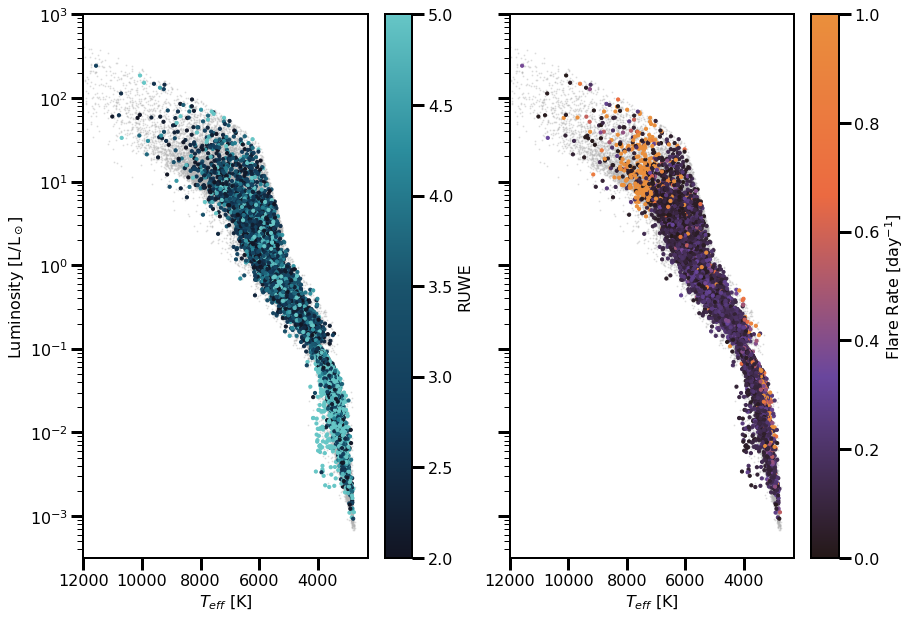

In [255]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,10), 
                               sharex=True, sharey=True)
ruwe_cutoff = 2.0
fig.set_facecolor('w')
ax1.plot(catalog['teff'], catalog['lum'], '.', 
         c='#b3b3b3', ms=2, alpha=0.3, zorder=0)
im = ax1.scatter(catalog['teff'][catalog['RUWE']>=ruwe_cutoff], 
            catalog['lum'][catalog['RUWE']>=ruwe_cutoff], 
            c=catalog['RUWE'][catalog['RUWE']>=ruwe_cutoff], s=10, 
            vmin=ruwe_cutoff, vmax=5, zorder=3,
            cmap=cm1.reversed())
fig.colorbar(im, ax=ax1, label='RUWE')
#ax1.colorbar(label='RUWE')

inds = np.where((catalog['teff'] > 6000) & 
                (catalog['lum']>3) & 
                (catalog['N_flares_per_day']>2) &
                (catalog['RUWE'] < ruwe_cutoff))[0]
good_inds = np.delete(np.arange(0,len(catalog),1,dtype=int), inds)
ax2.plot(catalog['teff'][good_inds], catalog['lum'][good_inds], '.',
            c='#b3b3b3', ms=2, alpha=0.3, zorder=0)

good_inds = catalog['RUWE'] > ruwe_cutoff
im = ax2.scatter(catalog['teff'][good_inds], catalog['lum'][good_inds], 
            c=catalog['N_flares_per_day'][good_inds], s=10, vmin=0, vmax=1,
            cmap=cm.reversed(), zorder=3)
fig.colorbar(im, ax=ax2, label='Flare Rate [day$^{-1}$]')
#ax2.colorbar(label='Flare Rate')

plt.xlim(12000,2300)
plt.yscale('log')
plt.ylim(10**-3.5, 10**3)
ax1.set_xlabel('$T_{eff}$ [K]')
ax2.set_xlabel('$T_{eff}$ [K]')
ax1.set_ylabel('Luminosity [L/L$_\odot$]')
ax1.set_rasterized(True)
ax2.set_rasterized(True)
plt.savefig('ruwe_hr.pdf', dpi=250, rasterize=True, bbox_inches='tight')

In [256]:
catalog

TIC_ID,OBS_Sector,TICv8_ra,TICv8_dec,TICv8_Teff,TICv8_Tmag,TICv8_d,BANYAN_BEST_HYP,N_flares,N_flares_per_day,flare_amp_max,flare_amp_median,flare_dur_max,flare_dur_median,flare_prob_max,flare_prob_median,Total_obs_time,flare_rates,teff,e_teff,rp,bp,lum,rad,H,J,K,source_id,bp_rp,phot_g_mean_mag,parallax,astrometric_chi2_al,astrometric_n_good_obs_al,phot_bp_mean_flux_over_error,parallax_over_error,phot_rp_mean_flux_over_error,RUWE
int64,str38,float64,float64,float64,float64,float64,str6,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1078,11,218.813157,-28.228133,4861.0,9.655,816.675,FIELD,4,0.14545454545454545,0.003428,0.002714,0.054869,0.054863,0.77,0.71,25.76527777777778,0.10595655220742818,4861.0,122.0,9.61644,10.9063,nan,10.2938,8.153,8.682,7.948,6.222126444636599e+18,1.2898435592651367,10.311180114746094,1.19898903380863,160.21450805664062,106.0,790.595458984375,20.84502410888672,497.88214111328125,1.00620940093219
1275,11,218.834618,-27.923627,5820.0,9.589,115.982,FIELD,4,0.14545454545454545,0.008698,0.00648,0.060451,0.055218,0.96,0.82,25.76527777777778,0.12536251415018057,5819.9,123.87,9.54119,10.3669,1.06120181,1.01326,8.719,8.961,8.62,6.222239724396885e+18,0.825688362121582,10.021866798400879,8.59353368728468,240.35179138183594,116.0,845.9616088867188,182.05783081054688,666.5332641601562,1.0329199744065014
1307,11,218.813657,-27.858749,5268.0,10.146,113.297,FIELD,3,0.10909090909090909,0.003425,0.00329,0.056947,0.054874,0.67,0.62,25.76527777777778,0.07141393994932886,5268.0,137.572,10.0963,11.1118,0.561601758,0.899654,9.0,9.4,8.893,6.222241171802705e+18,1.0155773162841797,10.6712646484375,8.797625576636397,255.01373291015625,173.0,1700.4886474609375,248.4512176513672,964.3053588867188,0.9893452686194852
1454,11,218.755263,-27.601079,6058.0,10.002,196.799,FIELD,3,0.10909090909090909,0.00334,0.002633,0.05487,0.054868,0.6,0.55,25.76527777777778,0.0652040321276481,6058.0,nan,9.95369,10.7078,nan,1.25451,9.186,9.442,9.081,6.223004366015751e+18,0.754115104675293,10.399602890014648,0.5657055905580602,9152.17578125,82.0,689.2665405273438,1.152470350265503,509.9847412109375,7.607682242236453
8610,11,219.060014,-27.605315,2981.0,14.228,54.864,FIELD,4,0.14545454545454545,0.050022,0.047635,0.054936,0.054926,0.99,0.68,25.76527777777778,0.112554579267964,2981.0,157.0,14.3588,17.8177,0.004038154,0.238243,11.709,12.286,11.385,6.22227415285569e+18,3.4589385986328125,15.71449089050293,18.200321959747363,543.2988891601562,119.0,78.1392822265625,116.84416961669922,388.1961975097656,1.218359081209255
8842,11,219.030557,-27.22073,29262.0,15.096,1207.97,FIELD,3,0.10909090909090909,0.137976,0.12364,0.056038,0.055023,0.99,0.96,25.76527777777778,0.10750902916284834,29262.0,500.0,15.1565,14.8457,16.9102764,0.16,15.407,15.385,15.412,6.223051546232338e+18,-0.3107643127441406,15.008877754211426,0.8064570264838767,184.3882293701172,116.0,108.7310791015625,9.970955848693848,320.41595458984375,0.9047559334298276
10175,11,219.017859,-24.981375,4233.0,11.228,77.944,FIELD,4,0.14545454545454545,0.006997,0.005278,0.056261,0.054872,0.88,0.6,25.76527777777778,0.10246347905773272,4233.4,122.299,11.1662,12.8379,0.101243086,0.591503,9.44,10.089,9.256,6.223939363214988e+18,1.6717290878295898,12.030518531799316,12.801852564833375,139.35345458984375,105.0,366.734619140625,147.52987670898438,962.8167114257812,1.0102443689770126
10238,11,219.021985,-24.843958,5625.0,9.779,124.862,FIELD,2,0.07272727272727272,0.00513,0.004618,0.055564,0.055214,0.85,0.76,25.76527777777778,0.058606005067112284,5624.7,136.029,9.73341,10.5574,1.03253186,1.07005,8.889,9.216,8.793,6.272003105273964e+18,0.823944091796875,10.211559295654297,7.981303910692585,230.4019775390625,104.0,792.2357788085938,102.37853240966797,853.7973022460938,1.0669800541523653
10343,11,219.036201,-24.66793,5086.0,10.756,1282.37,FIELD,2,0.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


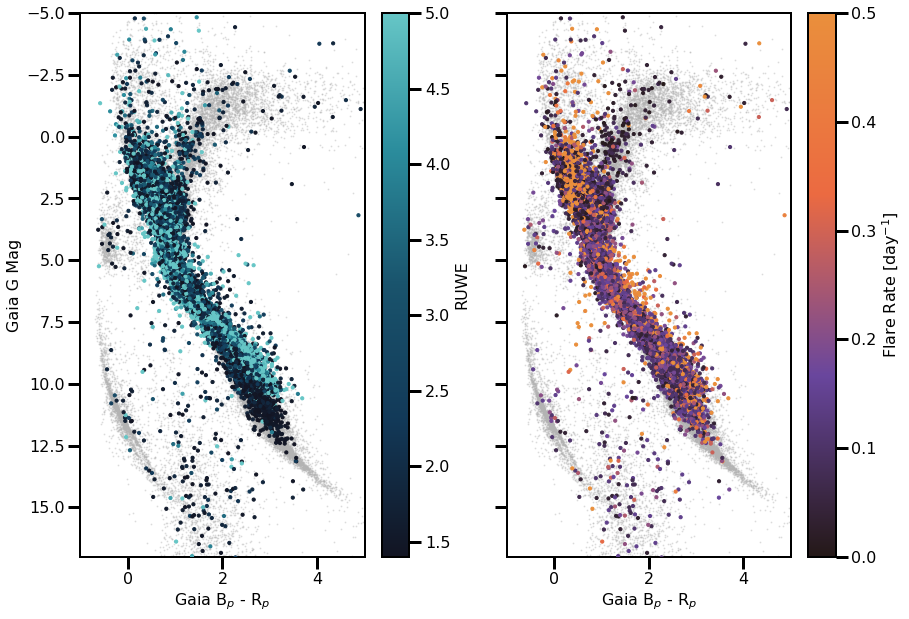

In [271]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,10), 
                               sharex=True, sharey=True)

absmag = catalog['phot_g_mean_mag'] - 5*np.log10(catalog['TICv8_d']/10)

ruwe_cutoff = 1.4
fig.set_facecolor('w')
ax1.plot(catalog['bp_rp'], absmag, '.', 
         c='#b3b3b3', ms=2, alpha=0.3, zorder=0)
im = ax1.scatter(catalog['bp_rp'][catalog['RUWE']>=ruwe_cutoff], 
            absmag[catalog['RUWE']>=ruwe_cutoff], 
            c=catalog['RUWE'][catalog['RUWE']>=ruwe_cutoff], s=10, 
            vmin=ruwe_cutoff, vmax=5, zorder=3,
            cmap=cm1.reversed())
fig.colorbar(im, ax=ax1, label='RUWE')
#ax1.colorbar(label='RUWE')

inds = np.where((catalog['teff'] > 6000) & 
                (catalog['lum']>3) & 
                (catalog['N_flares_per_day']>2) &
                (catalog['RUWE'] < ruwe_cutoff))[0]
good_inds = np.delete(np.arange(0,len(catalog),1,dtype=int), inds)
ax2.plot(catalog['bp_rp'][good_inds], 
         absmag[good_inds], '.',
         c='#b3b3b3', ms=2, alpha=0.3, zorder=0)

good_inds = catalog['RUWE'] > ruwe_cutoff
im = ax2.scatter(catalog['bp_rp'][good_inds], 
                 absmag[good_inds], 
                c=catalog['N_flares_per_day'][good_inds], s=10, 
                 vmin=0, vmax=0.5,
                cmap=cm.reversed(), zorder=3)
fig.colorbar(im, ax=ax2, label='Flare Rate [day$^{-1}$]')
#ax2.colorbar(label='Flare Rate')

plt.xlim(-1,5)
#plt.yscale('log')
plt.ylim(17,-5)
ax1.set_xlabel('Gaia B$_p$ - R$_p$')
ax2.set_xlabel('Gaia B$_p$ - R$_p$')
ax1.set_ylabel('Gaia G Mag')
ax1.set_rasterized(True)
ax2.set_rasterized(True)
plt.savefig('ruwe_hr.pdf', dpi=250, rasterize=True, bbox_inches='tight')

In [110]:
def amp_slope_fit(data, bins, i=0, j=-1):
    
    n, _ = np.histogram(data['amp']*100, bins=bins)
    y, binedges, _ = plt.hist(data['amp']*100, 
                              bins=bins,
                              weights=np.full(len(data['amp']),
                                          1.0/np.nansum(data['weights'])),
                          alpha=0.4)
    plt.yscale('log')
    plt.show()
    plt.close()

    x = binedges[1:] + 0.0
    logx = np.log10(x)
    logn = np.log10(n)
    q = logn > 0

    plt.plot(logx[i:j], np.log10(n[i:j]), '.', c='k')
    plt.plot(logx[i:j], linear([-2.5, 7], logx[i:j]), '--', c='w', linewidth=3)
    plt.show()

    results = minimize(linear_fit, x0=[-2.5, 7],
                       args=(logx[q][i:j-1]-np.diff(logx[q][i:j])/2., 
                             logn[q][i:j-1], np.sqrt(logn[q][i:j-1]) ), 
                       bounds=( (-10.0, 10.0), (-100, 100)),
                       method='L-BFGS-B', tol=1e-8)
    
    results.x[1] = 10**results.x[1]

    results2 = leastsq(power_law_resid, results.x,
                       args=(x[q][i:j-1]-np.diff(x[q][i:j])/2., 
                             n[q][i:j-1], 
                             np.sqrt(n[q][i:j-1]) ),
                       full_output=True)

    fit_params = results2[0]
    
    slope_err = np.sqrt(results2[1][0][0])

    model = linear([fit_params[0], np.log10(fit_params[1])], logx)
    #plt.plot(logx, model, c='r')
    #plt.show()

    #print(fit_params[0], slope_err)

    return fit_params[0], slope_err, binedges, y

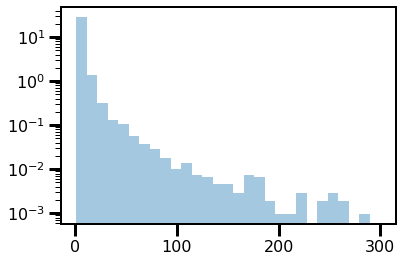

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


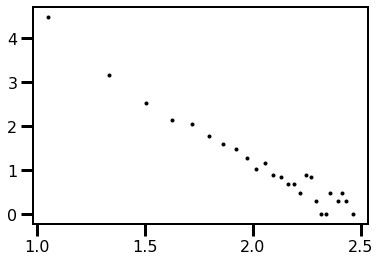

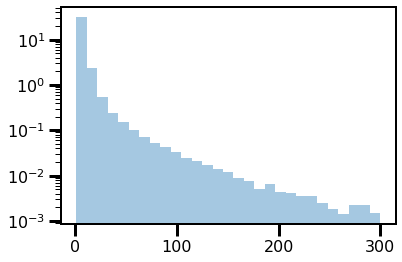

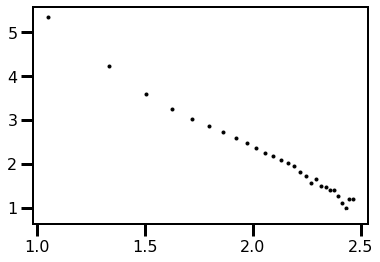

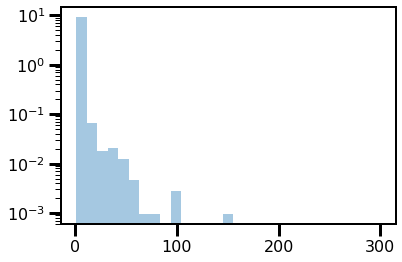

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


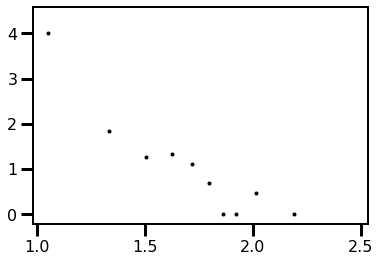

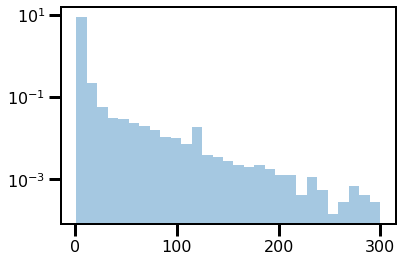

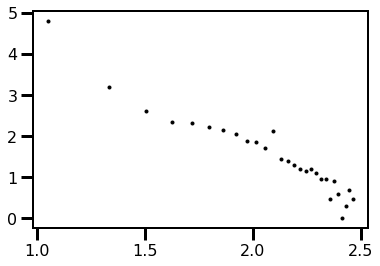

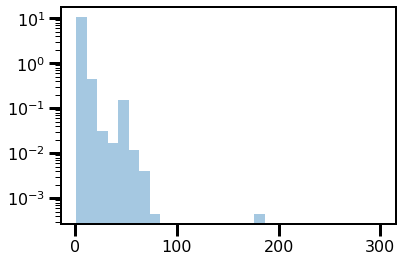

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


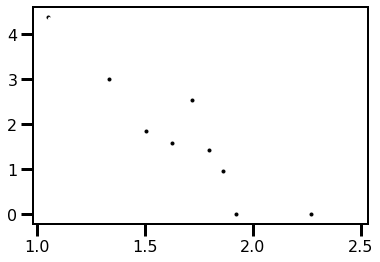

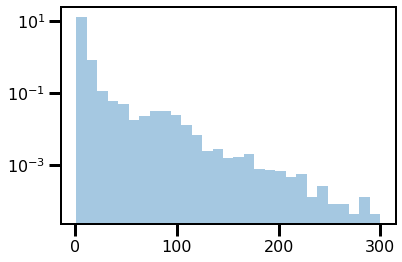

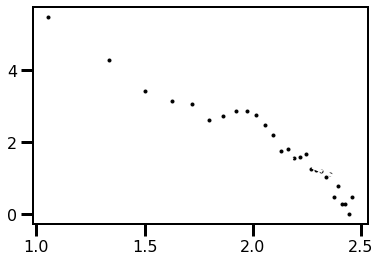

In [130]:
temp_bins = [2300,4500, 6000, 12000]
slopes_high = np.zeros(len(temp_bins)-1)
errs_high = np.zeros(len(temp_bins)-1)
slopes_low = np.zeros(len(temp_bins)-1)
errs_low = np.zeros(len(temp_bins)-1)
logx_high = []
logx_low = []

ruwe_cutoff = 2.0

bins = np.linspace(1,300,30)

for i in range(len(temp_bins)-1):
    dat = flares[(flares['teff']>=temp_bins[i]) &
                 (flares['teff']<=temp_bins[i+1]) &
                 (flares['RUWE']>=ruwe_cutoff)]

    slope, err, x, n = amp_slope_fit(dat, bins=bins)
    slopes_high[i] = slope
    errs_high[i] = err
    logx_high.append([x, n])

    
    dat = flares[(flares['teff']>=temp_bins[i]) &
                 (flares['teff']<=temp_bins[i+1]) &
                 (flares['RUWE']<ruwe_cutoff)]

    slope, err, x, n = amp_slope_fit(dat, bins=bins, i=0, j=-1)
    slopes_low[i] = slope
    errs_low[i] = err
    logx_low.append([x, n])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


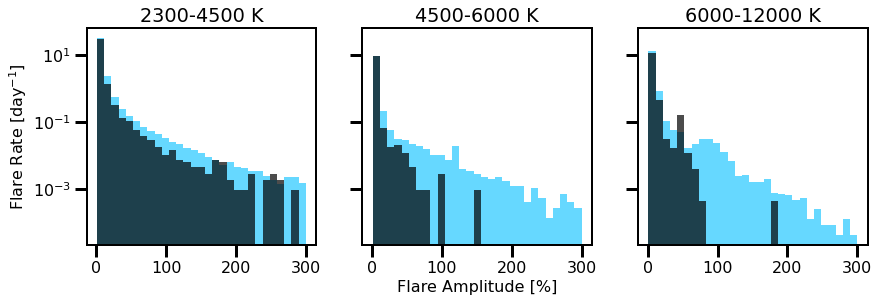

In [254]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,4), sharex=True, sharey=True)
fig.set_facecolor('w')
axes = [ax1, ax2, ax3]

for i in range(len(axes)):
    dat = flares[(flares['teff']>=temp_bins[i]) &
                 (flares['teff']<=temp_bins[i+1]) &
                 (flares['RUWE']<ruwe_cutoff)]
    axes[i].hist(dat['amp']*100, bins=bins, weights=np.full(len(dat['amp']),
                                                            1.0/np.nansum(dat['weights'])),
                 color='deepskyblue', alpha=0.6)
    
    dat = flares[(flares['teff']>=temp_bins[i]) &
                 (flares['teff']<=temp_bins[i+1]) &
                 (flares['RUWE']>=ruwe_cutoff)]
    axes[i].hist(dat['amp']*100, bins=bins, weights=np.full(len(dat['amp']),
                                                            1.0/np.nansum(dat['weights'])),
                 color='k', alpha=0.7)
    axes[i].set_title('{0}-{1} K'.format(temp_bins[i], temp_bins[i+1]))
plt.yscale('log')
ax2.set_xlabel('Flare Amplitude [%]')
ax1.set_ylabel('Flare Rate [day$^{-1}$]')
plt.savefig('ruwe_hists.pdf', dpi=250, rasterize=True, bbox_inches='tight')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()


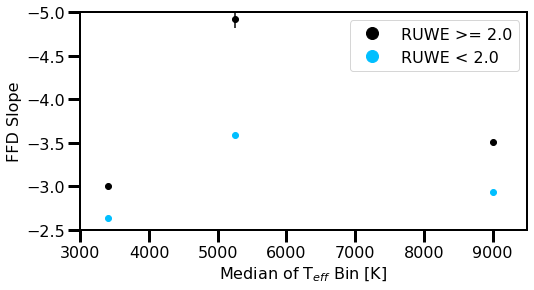

In [132]:
fig = plt.figure(figsize=(8,4))
fig.set_facecolor('w')
for i in range(len(slopes_high)):
    plt.errorbar((temp_bins[i]+temp_bins[i+1])/2.0, 
                 slopes_high[i], yerr=errs_high[i], marker='o', color='k')
    plt.errorbar((temp_bins[i]+temp_bins[i+1])/2.0, 
                 slopes_low[i], yerr=errs_low[i], marker='o', color='deepskyblue')
    
plt.plot(1,1,'ko', label='RUWE >= {}'.format(ruwe_cutoff))
plt.plot(1,1,'o', c='deepskyblue', label='RUWE < 2.0')
plt.legend()
plt.ylim(-2.5,-5)
plt.ylabel('FFD Slope')
plt.xlim(3000,9500)
plt.xlabel('Median of T$_{eff}$ Bin [K]')
plt.savefig('ruwe.png', dpi=250, rasterize=True, bbox_inches='tight')